<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/LDA_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

アヤメのデータの線形判別分析（LDA)

In [5]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Read iris data
iris = datasets.load_iris()
X = iris.data
#y = iris.target
target_names = iris.target_names
y = iris.target
y_name = target_names[iris.target]
K = 3

In [7]:
## LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_r = lda.fit(X, y).transform(X)

print(X_r.shape)
#pca = PCA(n_components=2)
#X_r = pca.fit(X).transform(X)

(150, 2)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


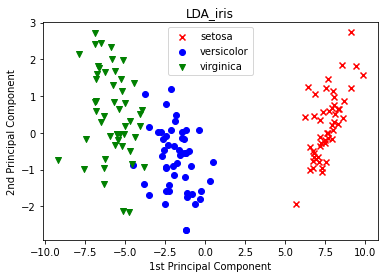

In [8]:
## colors
colors = ['red', 'blue', 'green']
markers = ['x', 'o', 'v']

## plot
plt.figure()
for c, marker, target_name  in zip(colors, markers, target_names):
    plt.scatter(X_r[y_name == target_name, 0], X_r[y_name == target_name, 1], c=c, marker=marker, label = target_name)
plt.legend()
plt.title('LDA_iris')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.savefig('lda_iris.eps')
plt.show()

In [9]:
# Classification the trining samples by nearest centroid classifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = NearestCentroid()
clf.fit(X_r, y)
y_pred = clf.predict(X_r)

#print(y_pred)

print(classification_report(y, y_pred))

CFM = confusion_matrix(y, y_pred)
print('Confusion Matirx\n', CFM)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

Confusion Matirx
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


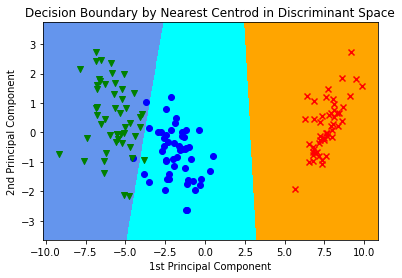

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_r[:, 0].min() - 1, X_r[:, 0].max() + 1
y_min, y_max = X_r[:, 1].min() - 1, X_r[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for c, marker, target_name  in zip(colors, markers, target_names):
    plt.scatter(X_r[y_name == target_name, 0], X_r[y_name == target_name, 1], c=c, marker=marker, label = target_name)

#plt.scatter(X_r[:, 0], X_r[:, 1], c=y, cmap=cmap_bold, 
#                edgecolor='k', s=20)
plt.title("Decision Boundary by Nearest Centrod in Discriminant Space")
#plt.axis('tight')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.savefig('lda_iris_boundary.eps')

plt.show()
